In [1]:
from pynq import GPIO

from time import sleep
from doa_mts import *
o1 = doaMtsOverlay('doa_mts.bit')

# o1.init_rf_clks()
# sleep(5)

# o1.configure_adcs(centre_freq=4900)
# sleep(1)



In [2]:
# o1.mts_sync()

In [3]:
# print(fasf)

In [4]:
# sleep(1)


# o1.configure_adcs(centre_freq=4900)
# o1.init_tile_sync()


# o1.verify_clock_tree()

# o1.sync_tiles()

In [10]:
o1.mts_sync(adcTarget = -1, mixer_phase1=-90, mixer_phase2=-92, mixer_phase3=90, mixer_phase4=94)

import socket
import struct
import numpy as np
import netifaces as ni
from rfsoc4x2 import oled

iface = ni.gateways()['default'][ni.AF_INET][1]
ip_address = ni.ifaddresses(iface)[2][0]['addr']
oled = oled.oled_display()
oled.write("IP Addr({}):\n{}".format(iface, ip_address))


port = 4000
server_ip = ip_address  # Use the appropriate IP address or hostname
server_port = port  # Use a free port number

server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Bind the socket to the server IP and port
server_socket.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
server_socket.bind((server_ip, server_port))

server_socket.listen(1)

# Accept a connection from the client
client_socket, client_address = server_socket.accept()        

# Receive and unpack the data size (number of Int16 elements) as a 16-bit integer
data_size = struct.unpack('Q', client_socket.recv(64))[0]

# Get data from ADCs
data = o1.get_custom_data(data_size)

# Pack the data as binary
data_binary = struct.pack('h' * data_size, *data)

# Send the data
client_socket.sendall(data_binary)

Failed at  7  : MTS Alignment is not stable - please power-cycle board and verify board connections...


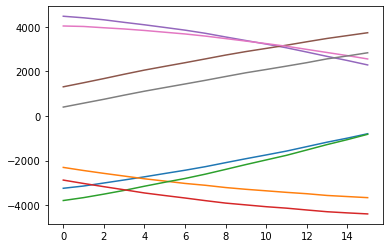

In [8]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
channels = 8 # 4 I + 4 Q
N = len(o1.adc_capture) // channels

iterations = 16
for i in range(iterations):
    AlignedCaptureSamples = np.zeros((1,len(o1.adc_capture)),dtype=np.int16)
    o1.internal_capture(AlignedCaptureSamples)

    ShapedCaptureSamples = np.zeros((channels, N), dtype=np.int16)
    for i in range(channels):
        ShapedCaptureSamples[i] = AlignedCaptureSamples[0][i::channels]

    # iqData = np.zeros((4, N), dtype=np.cdouble)
    # idx = 0
    # for i in range(0, 8, 2):
    #     iqData[idx] = np.conjugate(ShapedCaptureSamples[i] + 1j * ShapedCaptureSamples[i+1])
    #     idx = idx + 1
    N = len(AlignedCaptureSamples[0])  # choose power of two for efficiency
    Tile0 = -ShapedCaptureSamples[0][:N]/2**15
    TileN = ShapedCaptureSamples[1][:N]/2**15
    x_corr = signal.fftconvolve(TileN, Tile0[::-1], mode='full')  # compute the cross corrleation of non-adjacent channels
    lag0 = np.argmax(x_corr)
    failed = False
    if (lag0 != (N-1)):
        failed = True
        print("Failed at ", i, " : MTS Alignment is not stable - please power-cycle board and verify board connections...")
        pStart = 0
        pNumSamples = 16
        plt.plot(ShapedCaptureSamples[0][pStart:(pStart+pNumSamples)])
        plt.plot(ShapedCaptureSamples[1][pStart:(pStart+pNumSamples)])
        plt.plot(ShapedCaptureSamples[2][pStart:(pStart+pNumSamples)])
        plt.plot(ShapedCaptureSamples[3][pStart:(pStart+pNumSamples)])
        plt.plot(ShapedCaptureSamples[4][pStart:(pStart+pNumSamples)])
        plt.plot(ShapedCaptureSamples[5][pStart:(pStart+pNumSamples)])
        plt.plot(ShapedCaptureSamples[6][pStart:(pStart+pNumSamples)])
        plt.plot(ShapedCaptureSamples[7][pStart:(pStart+pNumSamples)])
        plt.show()
        break
if not failed :
    print("MTS Successful")

In [7]:
print(zsdfsd)

NameError: name 'zsdfsd' is not defined

In [ ]:
o1.mts_sync()

In [ ]:
# o1.configure_adcs(sample_freq=5000, centre_freq=0)

In [ ]:
# o1.xrfdc.adc_tiles[2].Reset()

In [ ]:
# o1.adc[0].UpdateEvent(3)

In [ ]:
o1.init_tile_sync()

o1.verify_clock_tree()

o1.sync_tiles()

In [ ]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
channels = 8 # 4 I + 4 Q
N = len(o1.adc_capture) // channels

iterations = 16
for i in range(iterations):
    AlignedCaptureSamples = np.zeros((1,len(o1.adc_capture)),dtype=np.int16)
    o1.internal_capture(AlignedCaptureSamples)

    ShapedCaptureSamples = np.zeros((channels, N), dtype=np.int16)
    for i in range(channels):
        ShapedCaptureSamples[i] = AlignedCaptureSamples[0][i::channels]

    # iqData = np.zeros((4, N), dtype=np.cdouble)
    # idx = 0
    # for i in range(0, 8, 2):
    #     iqData[idx] = np.conjugate(ShapedCaptureSamples[i] + 1j * ShapedCaptureSamples[i+1])
    #     idx = idx + 1
    N = len(AlignedCaptureSamples[0])  # choose power of two for efficiency
    Tile0 = -ShapedCaptureSamples[0][:N]/2**15
    TileN = ShapedCaptureSamples[1][:N]/2**15
    x_corr = signal.fftconvolve(TileN, Tile0[::-1], mode='full')  # compute the cross corrleation of non-adjacent channels
    lag0 = np.argmax(x_corr)
    failed = False
    if (lag0 != (N-1)):
        failed = True
        print("Failed at ", i, " : MTS Alignment is not stable - please power-cycle board and verify board connections...")
        pStart = 0
        pNumSamples = 16
        plt.plot(ShapedCaptureSamples[0][pStart:(pStart+pNumSamples)])
        plt.plot(ShapedCaptureSamples[1][pStart:(pStart+pNumSamples)])
        plt.plot(ShapedCaptureSamples[2][pStart:(pStart+pNumSamples)])
        plt.plot(ShapedCaptureSamples[3][pStart:(pStart+pNumSamples)])
        plt.plot(ShapedCaptureSamples[4][pStart:(pStart+pNumSamples)])
        plt.plot(ShapedCaptureSamples[5][pStart:(pStart+pNumSamples)])
        plt.plot(ShapedCaptureSamples[6][pStart:(pStart+pNumSamples)])
        plt.plot(ShapedCaptureSamples[7][pStart:(pStart+pNumSamples)])
        plt.show()
        break
if not failed :
    print("MTS Successful")

In [ ]:
o1.adc[0].MixerSettings['MixerType'] = 3


In [ ]:

o1.adc[0].MixerSettings['MixerType'] = xrfdc.MIXER_TYPE_OFF
o1.adc[1].MixerSettings['MixerType'] = xrfdc.MIXER_TYPE_OFF
o1.adc[2].MixerSettings['MixerType'] = xrfdc.MIXER_TYPE_OFF
o1.adc[3].MixerSettings['MixerType'] = xrfdc.MIXER_TYPE_OFF

In [ ]:
o1.adc[0].MixerSettings['MixerMode'] = xrfdc.MIXER_MODE_OFF
o1.adc[1].MixerSettings['MixerMode'] = xrfdc.MIXER_MODE_OFF
o1.adc[2].MixerSettings['MixerMode'] = xrfdc.MIXER_MODE_OFF
o1.adc[3].MixerSettings['MixerMode'] = xrfdc.MIXER_MODE_OFF

In [ ]:
o1.adc[0].QMCSettings['EventSource'] = 3
o1.adc[1].QMCSettings['EventSource'] = 3
o1.adc[2].QMCSettings['EventSource'] = 3
o1.adc[3].QMCSettings['EventSource'] = 3


In [ ]:
o1.adc[0].CoarseDelaySettings['EventSource'] = 3
o1.adc[1].CoarseDelaySettings['EventSource'] = 3
o1.adc[2].CoarseDelaySettings['EventSource'] = 3
o1.adc[3].CoarseDelaySettings['EventSource'] = 3

In [ ]:
o1.adc[0].QMCSettings

In [ ]:
o1.adc[0].CoarseDelaySettings


In [ ]:
o1.adc[0].MixerSettings

In [ ]:
o1.adc[0].ResetInternalFIFOWidth()

In [ ]:
o1.adc[0].GetConnectedIData()

In [ ]:
o1.adc_tiles[0].PLLConfig

In [ ]:
o1.xrfdc.mts_adc_config.Marker_Delay

In [ ]:
o1.xrfdc.mts_adc_config.Offset[2] = 0

In [ ]:
print('ADC 0: Latency:' + str(o1.xrfdc.mts_adc_config.Latency[0])+ ' Offset:'
      + str(o1.xrfdc.mts_adc_config.Offset[0]) +', ADC 2: Latency:' + str(o1.xrfdc.mts_adc_config.Latency[2])+ ' Offset:'
      + str(o1.xrfdc.mts_adc_config.Offset[2])
     )  

In [ ]:

o1.configure_adcs(centre_freq=4900)

o1.init_tile_sync()

o1.verify_clock_tree()

o1.sync_tiles()

In [ ]:
print(fasfas)

In [ ]:
o1.configure_dacs()

In [ ]:
adc_tiles = {}
adc = {}
bitvector = o1.ACTIVE_ADC_TILES

for n in range(MAX_ADC_TILES):
    if (bitvector & 0x1):
        adc_tiles[n] = o1.xrfdc.adc_tiles[n]
        adc[n] = adc_tiles[n].blocks[0]
        adc[n+1] = adc_tiles[n].blocks[1]
    bitvector = bitvector >> 1

dac_tiles = {}
dac = {}
bitvector = o1.ACTIVE_DAC_TILES

for n in range(MAX_DAC_TILES):
    if (bitvector & 0x1):
        dac_tiles[n] = o1.xrfdc.dac_tiles[n]
        dac[n] = dac_tiles[n].blocks[0]
    bitvector = bitvector >> 1

In [ ]:
# sleep(0.5)
o1.xrfdc.mts_dac_config.Tiles = 0b0101 # turn only one tile on first
o1.xrfdc.mts_adc_config.Tiles = 0b0101
o1.xrfdc.mts_dac_config.SysRef_Enable = 1
o1.xrfdc.mts_adc_config.SysRef_Enable = 1
o1.xrfdc.mts_dac_config.Target_Latency = -1
o1.xrfdc.mts_adc_config.Target_Latency = -1
o1.xrfdc.mts_dac()
o1.xrfdc.mts_adc()


# adc_tiles[0].Reset
# adc[0].ResetNCOPhase()
# adc[1].ResetNCOPhase()
# adc_tiles[0].SetupFIFOObs(0)
# adc_tiles[0].SetupFIFOObs(1)

# adc_tiles[2].Reset
# adc[2].ResetNCOPhase()
# adc[3].ResetNCOPhase()
# adc_tiles[2].SetupFIFOObs(0)
# adc_tiles[2].SetupFIFOObs(1) 
# adc_tiles[0].DumpRegs
# adc_tiles[2].DumpRegs
o1.verify_clock_tree()

o1.xrfdc.mts_dac_config.SysRef_Enable = 1
o1.xrfdc.mts_adc_config.SysRef_Enable = 1
o1.xrfdc.mts_dac()
o1.xrfdc.mts_adc()
adc_tiles[0].PLLLockStatus

In [ ]:
o1.xrfdc.adc_tiles[0].PLLLockStatus

In [ ]:
o1.adc[0].DSA

In [ ]:
adc_tiles[2].PLLLockStatus

In [ ]:
o1.xrfdc.write(0x0100, 1)
o1.xrfdc.read(0x0100)

In [ ]:
o1.adc[0].BlockStatus

In [ ]:
o1.usp_rf_data_converter_1.read(0x0228)


In [ ]:
o1.xrfdc.IPStatus

In [ ]:
o1.xrfdc.ClkDistribution

In [ ]:
server_socket.listen(1)

# Accept a connection from the client
client_socket, client_address = server_socket.accept()        

# Receive and unpack the data size (number of Int16 elements) as a 16-bit integer
data_size = struct.unpack('Q', client_socket.recv(64))[0]

# Get data from ADCs
data = o1.get_custom_data(data_size)

# Pack the data as binary
data_binary = struct.pack('h' * data_size, *data)

# Send the data
client_socket.sendall(data_binary)

In [ ]:
print(fasfsa)

In [ ]:
o1.configure_adcs()

In [ ]:
pll_freq=125.00 
sample_freq=4000.00
adc1.DynamicPLLConfig(1, pll_freq, sample_freq)

In [ ]:
tile224 = o1.xrfdc.adc_tiles[0]
tile226 = o1.xrfdc.adc_tiles[2]

adc1 = o1.xrfdc.adc_tiles[0].blocks[0]
adc2 = o1.xrfdc.adc_tiles[0].blocks[1]
adc3 = o1.xrfdc.adc_tiles[2].blocks[0]
adc4 = o1.xrfdc.adc_tiles[2].blocks[1]
print(adc1)


In [ ]:
adc_tiles = {}
adc = {}
bitvector = o1.ACTIVE_ADC_TILES

for n in range(MAX_ADC_TILES):
    if (bitvector & 0x1):
        adc_tiles[n] = o1.xrfdc.adc_tiles[n]
        adc[n] = adc_tiles[n].blocks[0]
        adc[n+1] = adc_tiles[n].blocks[1]
    bitvector = bitvector >> 1

dac_tiles = {}
dac = {}
bitvector = o1.ACTIVE_DAC_TILES

for n in range(MAX_DAC_TILES):
    if (bitvector & 0x1):
        dac_tiles[n] = o1.xrfdc.dac_tiles[n]
        dac[n] = dac_tiles[n].blocks[0]
    bitvector = bitvector >> 1

In [ ]:
print(list(dac))

In [ ]:
o1.adc_tiles

In [ ]:

o1.configure_adc(0, 0)

In [ ]:
o1.xrfdc.adc_tiles[2].blocks[0, 1].ResetNCOPhase()

In [ ]:
o1.init_tile_sync()
o1.verify_clock_tree()
o1.sync_tiles()

In [ ]:
try:
    while True:
        

            server_socket.listen(1)

            # Accept a connection from the client
            client_socket, client_address = server_socket.accept()        

            # Receive and unpack the data size (number of Int16 elements) as a 16-bit integer
            data_size = struct.unpack('Q', client_socket.recv(64))[0]

            # Get data from ADCs
            data = o1.get_custom_data(data_size)
            o1.dac0_player[:] = np.repeat(data, len(o1.dac0_player)/data_size)
            o1.dac1_player[:] = np.repeat(data, len(o1.dac0_player)/data_size)
            # Pack the data as binary
            data_binary = struct.pack('h' * data_size, *data)

            # Send the data
            client_socket.sendall(data_binary)
            
            for n, is_active in enumerate(bin(o1.ACTIVE_ADC_TILES)[-MAX_ADC_TILES:][::-1]):
                if is_active == '1':
                    print(f"Latency DAC Tile {n}: {o1.xrfdc.mts_dac_config.Latency[n]}")

            for n, is_active in enumerate(bin(o1.ACTIVE_DAC_TILES)[-MAX_DAC_TILES:][::-1]):
                if is_active == '1':
                    print(f"Latency ADC Tile {n}: {o1.xrfdc.mts_adc_config.Latency[n]}")
except KeyboardInterrupt:
    print("Transmission interrupted by the user.")

In [ ]:
def init_tile_sync(self):
    """ Resets the MTS alignment engine"""
    self.xrfdc.mts_dac_config.Tiles = 0b0101 # turn only one tile on first
    self.xrfdc.mts_adc_config.Tiles = 0b0101
    self.xrfdc.mts_dac_config.SysRef_Enable = 1
    self.xrfdc.mts_adc_config.SysRef_Enable = 1
    self.xrfdc.mts_dac_config.Target_Latency = -1
    self.xrfdc.mts_adc_config.Target_Latency = -1
    self.xrfdc.mts_dac()
    self.xrfdc.mts_adc()
    # Reset MTS ClockWizard MMCM - refer to PG065
    self.clocktreeMTS.MTSclkwiz.mmio.write_reg(CLOCKWIZARD_RESET_ADDRESS, CLOCKWIZARD_RESET_TOKEN)
    time.sleep(0.1)
    # Reset only user selected DAC tiles
    bitvector = self.ACTIVE_DAC_TILES
    for n in range(MAX_DAC_TILES):
        if (bitvector & 0x1):
            self.xrfdc.dac_tiles[n].Reset()
        bitvector = bitvector >> 1
    # Reset ADC FIFO of only user selected tiles - restarts MTS engine
    for toggleValue in range(0,1):
        bitvector = self.ACTIVE_ADC_TILES
        for n in range(MAX_ADC_TILES):
            if (bitvector & 0x1):
                self.xrfdc.adc_tiles[n].blocks[0].ResetNCOPhase()
                self.xrfdc.adc_tiles[n].blocks[1].ResetNCOPhase()
                self.xrfdc.adc_tiles[n].SetupFIFOBoth(toggleValue)
            bitvector = bitvector >> 1
            
    # self.xrfdc.mts_dac_config.Tiles = 0b0101 # turn only one tile on first
    # self.xrfdc.mts_adc_config.Tiles = 0b0101
    # self.xrfdc.mts_dac_config.SysRef_Enable = 0
    # self.xrfdc.mts_adc_config.SysRef_Enable = 0
    # self.xrfdc.mts_dac_config.Target_Latency = -1
    # self.xrfdc.mts_adc_config.Target_Latency = -1
    # self.xrfdc.mts_dac()
    # self.xrfdc.mts_adc()

def sync_tiles(self, dacTarget=-1, adcTarget=-1):
    """ Configures RFSoC MTS alignment"""
    # Set which RF tiles use MTS and turn MTS off
    if self.ACTIVE_DAC_TILES > 0:
        self.xrfdc.mts_dac_config.Tiles = self.ACTIVE_DAC_TILES # group defined in binary 0b1111
        self.xrfdc.mts_dac_config.SysRef_Enable = 1
        self.xrfdc.mts_dac_config.Target_Latency = dacTarget 
        self.xrfdc.mts_dac()
    # else:
    #     self.xrfdc.mts_dac_config.Tiles = 0x0
    #     self.xrfdc.mts_dac_config.SysRef_Enable = 0
    if self.ACTIVE_ADC_TILES > 0:
        self.xrfdc.mts_adc_config.Tiles = self.ACTIVE_ADC_TILES
        self.xrfdc.mts_adc_config.SysRef_Enable = 1
        self.xrfdc.mts_adc_config.Target_Latency = adcTarget
        self.xrfdc.mts_adc()
    # else:
    #     self.xrfdc.mts_adc_config.Tiles = 0x0
    #     self.xrfdc.mts_adc_config.SysRef_Enable = 0
def desync_tiles(self, dacTarget=-1, adcTarget=-1):
    """ Configures RFSoC MTS alignment"""
    # Set which RF tiles use MTS and turn MTS off
    if self.ACTIVE_DAC_TILES > 0:
        self.xrfdc.mts_dac_config.Tiles = self.ACTIVE_DAC_TILES # group defined in binary 0b1111
        self.xrfdc.mts_dac_config.SysRef_Enable = 0
        self.xrfdc.mts_dac_config.Target_Latency = dacTarget 
        self.xrfdc.mts_dac()
    # else:
    #     self.xrfdc.mts_dac_config.Tiles = 0x0
    #     self.xrfdc.mts_dac_config.SysRef_Enable = 0
    if self.ACTIVE_ADC_TILES > 0:
        self.xrfdc.mts_adc_config.Tiles = self.ACTIVE_ADC_TILES
        self.xrfdc.mts_adc_config.SysRef_Enable = 0
        self.xrfdc.mts_adc_config.Target_Latency = adcTarget
        self.xrfdc.mts_adc()
    # else:
    #     self.xrfdc.mts_adc_config.Tiles = 0x0
    #     self.xrfdc.mts_adc_config.SysRef_Enable = 0



def verify_clock_tree(self):
    """ Verify the PL and PL_SYSREF clocks are active by verifying an MMCM is in the LOCKED state"""
    Xstatus = self.clocktreeMTS.MTSclkwiz.read(CLOCKWIZARD_LOCK_ADDRESS) # reads the LOCK register
    # the ClockWizard AXILite registers are NOT fully mapped: refer to PG065
    if (Xstatus != 1):
        raise Exception("The MTS ClockTree has failed to LOCK. Please verify board clocking configuration")


In [ ]:
def init_tile_sync(self):
    """ Resets the MTS alignment engine"""
    self.xrfdc.mts_dac_config.Tiles = 0b0101 # turn only one tile on first
    self.xrfdc.mts_adc_config.Tiles = 0b0101
    self.xrfdc.mts_dac_config.SysRef_Enable = 1
    self.xrfdc.mts_adc_config.SysRef_Enable = 1
    self.xrfdc.mts_dac_config.Target_Latency = -1
    self.xrfdc.mts_adc_config.Target_Latency = -1
    self.xrfdc.mts_dac()
    self.xrfdc.mts_adc()
    # Reset MTS ClockWizard MMCM - refer to PG065
    self.clocktreeMTS.MTSclkwiz.mmio.write_reg(CLOCKWIZARD_RESET_ADDRESS, CLOCKWIZARD_RESET_TOKEN)
    time.sleep(0.1)
    # Reset only user selected DAC tiles
    bitvector = self.ACTIVE_DAC_TILES
    for n in range(MAX_DAC_TILES):
        if (bitvector & 0x1):
            self.xrfdc.dac_tiles[n].Reset()
        bitvector = bitvector >> 1
    # Reset ADC FIFO of only user selected tiles - restarts MTS engine
    for toggleValue in range(0,1):
        bitvector = self.ACTIVE_ADC_TILES
        for n in range(MAX_ADC_TILES):
            if (bitvector & 0x1):
                self.xrfdc.adc_tiles[n].blocks[0].ResetNCOPhase()
                self.xrfdc.adc_tiles[n].blocks[1].ResetNCOPhase()
                self.xrfdc.adc_tiles[n].SetupFIFOBoth(toggleValue)
                self.xrfdc.adc_tiles[n].SetupFIFOObs(toggleValue)
            bitvector = bitvector >> 1
            
    # self.xrfdc.mts_dac_config.Tiles = 0b0101 # turn only one tile on first
    # self.xrfdc.mts_adc_config.Tiles = 0b0101
    # self.xrfdc.mts_dac_config.SysRef_Enable = 0
    # self.xrfdc.mts_adc_config.SysRef_Enable = 0
    # self.xrfdc.mts_dac_config.Target_Latency = -1
    # self.xrfdc.mts_adc_config.Target_Latency = -1
    # self.xrfdc.mts_dac()
    # self.xrfdc.mts_adc()

def sync_tiles(self, dacTarget=-1, adcTarget=-1):
    """ Configures RFSoC MTS alignment"""
    # Set which RF tiles use MTS and turn MTS off
    if self.ACTIVE_DAC_TILES > 0:
        self.xrfdc.mts_dac_config.Tiles = self.ACTIVE_DAC_TILES # group defined in binary 0b1111
        self.xrfdc.mts_dac_config.SysRef_Enable = 1
        self.xrfdc.mts_dac_config.Target_Latency = dacTarget 
        self.xrfdc.mts_dac()
    # else:
    #     self.xrfdc.mts_dac_config.Tiles = 0x0
    #     self.xrfdc.mts_dac_config.SysRef_Enable = 0
    if self.ACTIVE_ADC_TILES > 0:
        self.xrfdc.mts_adc_config.Tiles = self.ACTIVE_ADC_TILES
        self.xrfdc.mts_adc_config.SysRef_Enable = 1
        self.xrfdc.mts_adc_config.Target_Latency = adcTarget
        self.xrfdc.mts_adc()
    # else:
    #     self.xrfdc.mts_adc_config.Tiles = 0x0
    #     self.xrfdc.mts_adc_config.SysRef_Enable = 0
def desync_tiles(self, dacTarget=-1, adcTarget=-1):
    """ Configures RFSoC MTS alignment"""
    # Set which RF tiles use MTS and turn MTS off
    if self.ACTIVE_DAC_TILES > 0:
        self.xrfdc.mts_dac_config.Tiles = self.ACTIVE_DAC_TILES # group defined in binary 0b1111
        self.xrfdc.mts_dac_config.SysRef_Enable = 0
        self.xrfdc.mts_dac_config.Target_Latency = dacTarget 
        self.xrfdc.mts_dac()
    # else:
    #     self.xrfdc.mts_dac_config.Tiles = 0x0
    #     self.xrfdc.mts_dac_config.SysRef_Enable = 0
    if self.ACTIVE_ADC_TILES > 0:
        self.xrfdc.mts_adc_config.Tiles = self.ACTIVE_ADC_TILES
        self.xrfdc.mts_adc_config.SysRef_Enable = 0
        self.xrfdc.mts_adc_config.Target_Latency = adcTarget
        self.xrfdc.mts_adc()
    # else:
    #     self.xrfdc.mts_adc_config.Tiles = 0x0
    #     self.xrfdc.mts_adc_config.SysRef_Enable = 0



def verify_clock_tree(self):
    """ Verify the PL and PL_SYSREF clocks are active by verifying an MMCM is in the LOCKED state"""
    Xstatus = self.clocktreeMTS.MTSclkwiz.read(CLOCKWIZARD_LOCK_ADDRESS) # reads the LOCK register
    # the ClockWizard AXILite registers are NOT fully mapped: refer to PG065
    if (Xstatus != 1):
        raise Exception("The MTS ClockTree has failed to LOCK. Please verify board clocking configuration")


## 